This week we will be learning about aggregations and using them to do a deeper investigation into the effects of different types of joins. 

We will also do a few problems exploring matrix inverses. 

### Tutorials
- https://www.datacamp.com/community/tutorials/pandas-multi-index
- https://www.datacamp.com/community/tutorials/pandas-split-apply-combine-groupby

## Grouping Data

The expressiveness of Python and pandas allows complex group operations using any function that accepts a pandas object or NumPy array. This can include:

- Splitting a pandas object into pieces using one or more keys
- Calculating group summary statistics
- Applying within-group transformations or other manipulations
- Computing pivot tables and cross-tabulations
- Performing quantile analysis and other statistical group analyses

### GroupBy Operations

Group operations involve the `split-apply-combine` mechanism.

1. Data are split into groups based on one or more keys
2. A function is applied to each group
3. Results of the function application are combined into a new object

Grouping keys can take many forms, and the keys do not have to be all of the same type.

pandas `groupby` method returns a GroupBy object that can be re-used.

DataFrame columns can be used as the group keys.

Numeric aggregations will exclude `nuisance` (non-numeric) columns from the result

By default `groupby` groups on axis=0, but can group on any of the other axes.

### Iterating over groups

The GroupBy object supports iteration, generating a sequence of 2-tuples containing the group name along with the chunk of data.

Indexing a GroupBy object created from a DataFrame with a column name or array of column names has the effect of column subsetting for aggregation. This means that:
```
df.groupby('key1')['data1']
```
is essentially the same as:
```
df['data1'].groupby(df['key1'])
```

### Reindexing

The output of GroupBys are often multi-indexed. This is typically not the form you want for your analysis. This means that you will want to reset your index or remove multi indexes on your columns. See below for examples of that. 

In [8]:
import pandas as pd
import numpy as np

speeds = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0, 0),
        ("bird", "Psittaciformes", 24.0, 0),
        ("mammal", "Carnivora", 80.2, 0),
        ("mammal", "Primates", np.nan, 0),
        ("mammal", "Carnivora", 58, 0),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed", 'min_speed'),
)

not_reindexed = speeds.groupby(["class", "order"]).agg(['sum', 'mean'])
not_reindexed

max_speed        min_speed     
                            sum   mean       sum mean
class  order                                         
bird   Falconiformes      389.0  389.0         0  0.0
       Psittaciformes      24.0   24.0         0  0.0
mammal Carnivora          138.2   69.1         0  0.0
       Primates             0.0    NaN         0  0.0

In [2]:
not_reindexed.columns = ["_".join(i) for i in not_reindexed.columns]
not_reindexed

max_speed_sum  max_speed_mean  min_speed_sum  \
class  order                                                          
bird   Falconiformes           389.0           389.0              0   
       Psittaciformes           24.0            24.0              0   
mammal Carnivora               138.2            69.1              0   
       Primates                  0.0             NaN              0   

                       min_speed_mean  
class  order                           
bird   Falconiformes              0.0  
       Psittaciformes             0.0  
mammal Carnivora                  0.0  
       Primates                   0.0

In [3]:
not_reindexed.reset_index()

,class,order,max_speed_sum,max_speed_mean,min_speed_sum,min_speed_mean
0,bird,Falconiformes,389.0,389.0,0,0.0
1,bird,Psittaciformes,24.0,24.0,0,0.0
2,mammal,Carnivora,138.2,69.1,0,0.0
3,mammal,Primates,0.0,NaN,0,0.0


### All Data Descriptions


* `customers` - A table of customers. The unique id for the customer is `customer_id` meaning only one id per customer. 
* `orders` - A table of orders. The unique id for the order is `order_id` there is a foreign key (`customer_id`) that tells you which customer placed the order.
* `web_visits`: Describes visitors to the website, with `visitor_id` be a unique id per visitor to the website. If the visitor is a logged in customer then the `customer_id` has a value otherwise it is null. 
* `ad_clicks`: Describes clicks on ad on an external website, the `external_user_id` is an unique id per user from the external website. If the user is a known in customer then the `customer_id` has a value otherwise it is null. 

In [1]:
import generate_week_10_data

customers, orders, web_visits, ad_clicks = generate_week_10_data.create_data()

### Problem 1 (10 pts)

1. What is the order amount per `customer_name`, only include customers who have orders
2. What is the order amount per `customer_name`, include customers even if they have no orders

#### Grading: 
5 points per question. 2 points for the correct join and 3 point for the aggragations. 

In [3]:
orders_with_customers = orders.merge(customers, on="customer_id")
order_amount_per_customer = orders_with_customers.groupby("customer_name")["order_amount"].sum().reset_index()
print(order_amount_per_customer)
print()
orders_with_all_customers = customers.merge(orders, on="customer_id", how="left")
order_amount_all = orders_with_all_customers.groupby("customer_name")["order_amount"].sum().reset_index().fillna(0)
print(order_amount_all)

   customer_name  order_amount
0        chyloid   1818.810846
1      dermatoma   1360.926302
2     lamnectomy    946.281922
3  rapscallionly   1568.354524
4   receivership    667.381902
5         septal    765.455818
6          shita   1641.221802
7       tasselet    121.954147

   customer_name  order_amount
0      amputator      0.000000
1        chyloid   1818.810846
2      dermatoma   1360.926302
3    digitogenin      0.000000
4     lamnectomy    946.281922
5  rapscallionly   1568.354524
6   receivership    667.381902
7         septal    765.455818
8          shita   1641.221802
9       tasselet    121.954147


### Problem 2 (5 pts)
If you look at the raw results of the join you can visually see that there are duplicates for the columns that started in the `customer` table. This wasn't a concern above because we we doing an aggregation on a column in the `orders` table. Let's think through problems that require a join but are looking to do an aggregation with a column from the `customers` table. 

1. What is the average `customer_age` for customers who have placed orders. For this problem print the accurate average `customer_age` with duplicates remove and also print the inaccure average `customer_age` without duplicates removed. 
2. What is the average `customer_age` for customers who have placed orders versus those who haven't. 

#### Grading: 
5 points per question. 2 points for the correct join and 3 point for the aggragations. 

In [4]:
cust_orders = orders.merge(customers, on="customer_id")

unique_custs = cust_orders[['customer_id', 'customer_age']].drop_duplicates()
acc_avg_age = unique_custs["customer_age"].mean()
print("Accurate Avg Age:", acc_avg_age)

inacc_avg_age = cust_orders["customer_age"].mean()
print("Inaccurate Avg Age:", inacc_avg_age)

print()

cust_with_orders = customers[customers["customer_id"].isin(orders["customer_id"])]
cust_without_orders = customers[~customers["customer_id"].isin(orders["customer_id"])]

avg_age_with = cust_with_orders["customer_age"].mean()
avg_age_without = cust_without_orders["customer_age"].mean()

print("Avg Age (With Orders):", avg_age_with)
print("Avg Age (Without Orders):", avg_age_without)


Accurate Avg Age: 12.238621418224652
Inaccurate Avg Age: 11.693236578530342

Avg Age (With Orders): 12.238621418224652
Avg Age (Without Orders): 25.095221048254217


### Problem 3 

Per customer what is the total number of web visits and ads clicked on? 

For this problem I want you to start with the `customers_visits_clicks_raw` table below and again do an accurate count that only counts a web visit once and an inaccurate count that counts duplications. Here is what the results should look like: 

<img src="images/number_visits_clicks.png" width="800"/>


#### Grading: 
5 points for joining correctly. 5 points for the correct aggragtions.  


In [ ]:
# Start with this dataset 
customers_visits_clicks_raw = customers.merge(web_visits, on="customer_id", how="left").merge(ad_clicks, on="customer_id", how="left")

visits_clicks_per_cust = customers_visits_clicks_raw.groupby("customer_name").agg(
    total_visits=("interaction_id", "count"),  
    total_clicks=("click_id", "count")  
).reset_index()

print(visits_clicks_per_cust)

   customer_name  total_visits  total_clicks
0      amputator             0             3
1        chyloid             1             1
2      dermatoma             0             2
3    digitogenin             0             1
4     lamnectomy             2             2
5  rapscallionly             0             4
6   receivership             2             0
7         septal             1             1
8          shita             0             1
9       tasselet             0             0


### Problem 4 (5 pts)

We will now work through a problem with outer joins.

Create a dataframe with the daily number of: 
* web visits
* unique web visitors
* unique customers visiting website
* ads clicks
* unique users clicking
* unique customers clicking

You should include the full date range 2024-05-01 to 2024-05-09 even though not all dates are included in either dataframe. 

You will create this data frame two ways:
1. Join `web_visits` to `ad_clicks` first and then perform the calculations
2. Create aggregate dataframes for `web_visits` to `ad_clicks` first and then join those aggregate dataframes together

#### Grading: 
5 points per method. 2 points for the correct join and 3 point for the aggragations. 

In [9]:
full_dates = pd.DataFrame({"date": pd.date_range("2024-05-01", "2024-05-09")})

visits_clicks = web_visits.merge(ad_clicks, on="date", how="outer")

daily_stats = visits_clicks.groupby("date").agg(
    web_visits=("interaction_id", "count"),
    unique_web_visitors=("visitor_id", "nunique"),
    unique_cust_visits=("customer_id_x", "nunique"),  
    ad_clicks=("click_id", "count"),
    unique_users_clicking=("external_user_id", "nunique"),
    unique_cust_clicks=("customer_id_y", "nunique")  
).reset_index()

daily_stats = full_dates.merge(daily_stats, on="date", how="left").fillna(0)

print(daily_stats)

        date  web_visits  unique_web_visitors  unique_cust_visits  ad_clicks  \
0 2024-05-01           4                    4                   1          0   
1 2024-05-02           5                    5                   1          0   
2 2024-05-03          10                    5                   2         10   
3 2024-05-04          15                    5                   1         15   
4 2024-05-05           3                    1                   0          3   
5 2024-05-06           0                    0                   0          3   
6 2024-05-07           0                    0                   0          3   
7 2024-05-08           0                    0                   0          3   
8 2024-05-09           0                    0                   0          3   

   unique_users_clicking  unique_cust_clicks  
0                      0                   0  
1                      0                   0  
2                      2                   1  
3          

### Problem 5 (15 pts)

Using the same two methods as problem 4 attempt to include:
* mean time on page per date 
* total time on page per date

One method will lead to some incorrect values unless you do a bit more work to correct the values. 

Write out a which method leads to correct values, which leads to incorrect values and why. 

#### Grading: 
* 5 points per method. 2 points for the correct join and 3 point for the aggragations. 
* 5 points for the written explaination. 

The aggregate first and then goin approach works because the time calculations are done before joining, which gives the correct values. This is as opposed to the joing first and then aggregate approach, which causes issues with duplication. 

In [10]:
web_visits_agg = web_visits.groupby("date").agg(
    web_visits=("interaction_id", "count"),
    unique_web_visitors=("visitor_id", "nunique"),
    unique_cust_visits=("customer_id", "nunique"),
    total_time_on_page=("time_on_page", "sum"),  
    mean_time_on_page=("time_on_page", "mean")  
).reset_index()

ad_clicks_agg = ad_clicks.groupby("date").agg(
    ad_clicks=("click_id", "count"),
    unique_users_clicking=("external_user_id", "nunique"),
    unique_cust_clicks=("customer_id", "nunique")
).reset_index()

daily_stats_agg = web_visits_agg.merge(ad_clicks_agg, on="date", how="outer")

daily_stats_agg = full_dates.merge(daily_stats_agg, on="date", how="left").fillna(0)

print(daily_stats_agg)

        date  web_visits  unique_web_visitors  unique_cust_visits  \
0 2024-05-01         4.0                  4.0                 1.0   
1 2024-05-02         5.0                  5.0                 1.0   
2 2024-05-03         5.0                  5.0                 2.0   
3 2024-05-04         5.0                  5.0                 1.0   
4 2024-05-05         1.0                  1.0                 0.0   
5 2024-05-06         0.0                  0.0                 0.0   
6 2024-05-07         0.0                  0.0                 0.0   
7 2024-05-08         0.0                  0.0                 0.0   
8 2024-05-09         0.0                  0.0                 0.0   

   total_time_on_page  mean_time_on_page  ad_clicks  unique_users_clicking  \
0          105.071491          26.267873        0.0                    0.0   
1          139.279603          27.855921        0.0                    0.0   
2          153.804483          30.760897        2.0                    2.0 

### Problem 6 (15 pts)

Implement the full algorithm described in [Inverting Any Square Full-Rank Matrix](https://learning.oreilly.com/library/view/practical-linear-algebra/9781098120603/ch08.html#inverting-any-square) and reproduce Figure 8-3. Of course, your matrices will look different from Figure 8-3 because of random numbers, although the grid and identity matrices will be the same.

#### Grading: 
* 10 points for implimenting the algorithm. 
* 5 points for reproducing the figure. 

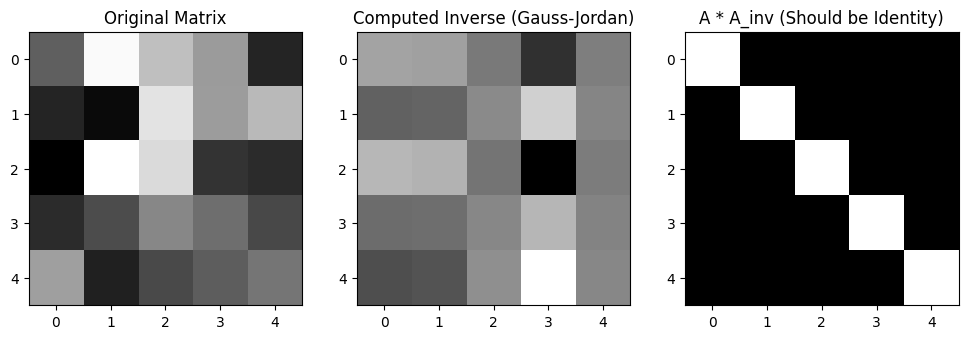

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def gauss_jordan_inverse(A):
    n = A.shape[0]
    I = np.eye(n)
    AI = np.hstack([A.astype(float), I])
    
    for i in range(n):
        max_row = np.argmax(np.abs(AI[i:, i])) + i
        AI[[i, max_row]] = AI[[max_row, i]]
        
        AI[i] = AI[i] / AI[i, i]
        for j in range(n):
            if i != j:
                AI[j] -= AI[i] * AI[j, i]
    
    return AI[:, n:]

np.random.seed(42)
n = 5
A = np.random.rand(n, n)
A_inv_gauss_jordan = gauss_jordan_inverse(A)
A_inv_numpy = np.linalg.inv(A)
I_computed = np.dot(A, A_inv_gauss_jordan)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(A, cmap='gray', interpolation='nearest')
axes[0].set_title("Original Matrix")
axes[1].imshow(A_inv_gauss_jordan, cmap='gray', interpolation='nearest')
axes[1].set_title("Computed Inverse (Gauss-Jordan)")
axes[2].imshow(I_computed, cmap='gray', interpolation='nearest')
axes[2].set_title("A * A_inv (Should be Identity)")
plt.show()


### Problem 7 (15 pts)

The LIVE EVIL rule applies to the inverse of multiplied matrices. Test this in code by creating two square full-rank matrices $A$ and $B$, then use Euclidean distance to compare:
1. $(AB)^{-1}$ 
2. $A^{-1}B^{-1}$
3. $B^{-1}A^{-1}$

Before starting to code, make a prediction about which results will be equal. Print out your results using formatting like the following:

```
Distance between (AB)^-1 and (A^-1)(B^-1) is = to Distance between (A^-1)(B^-1) and (B^-1)(A^-1)
Distance between (AB)^-1 and (B^-1)(A^-1) is != to Distance between (AB)^-1 and (A^-1)(B^-1)
Distance between (A^-1)(B^-1) and (B^-1)(A^-1) is = (AB)^-1 and (A^-1)(B^-1)
```

#### Grading: 
5 points per comparision. 

In [13]:
import numpy as np

np.random.seed(42) 
A = np.random.rand(3, 3)
B = np.random.rand(3, 3)

A_inv = np.linalg.inv(A)
B_inv = np.linalg.inv(B)

AB = np.dot(A, B)
AB_inv = np.linalg.inv(AB)

A_inv_B_inv = np.dot(A_inv, B_inv)
B_inv_A_inv = np.dot(B_inv, A_inv)

dist_AB_inv_A_inv_B_inv = np.linalg.norm(AB_inv - A_inv_B_inv)
dist_AB_inv_B_inv_A_inv = np.linalg.norm(AB_inv - B_inv_A_inv)
dist_A_inv_B_inv_B_inv_A_inv = np.linalg.norm(A_inv_B_inv - B_inv_A_inv)

print(f"Distance between (AB)^-1 and (A^-1)(B^-1) is {dist_AB_inv_A_inv_B_inv}")
print(f"Distance between (AB)^-1 and (B^-1)(A^-1) is {dist_AB_inv_B_inv_A_inv}")
print(f"Distance between (A^-1)(B^-1) and (B^-1)(A^-1) is {dist_A_inv_B_inv_B_inv_A_inv}")


Distance between (AB)^-1 and (A^-1)(B^-1) is 132.41663568272017
Distance between (AB)^-1 and (B^-1)(A^-1) is 3.294651128092491e-14
Distance between (A^-1)(B^-1) and (B^-1)(A^-1) is 132.41663568272017
